In [1]:
%reset -f

In [2]:
from MINE.Analysis import SessionAnalytics, ExperimentAnalytics
from MINE.StreamFilter import IStreamFilter, TimestampStreamFilter
from MINE.SessionFilters import ISessionFilter, ContainsStreamSessionFilter, ContainsMarkersSessionFilter

from MINE.Log import Log
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pyxdf

mpl.rcParams['figure.dpi'] = 300

In [3]:
def stream_filter() -> ContainsStreamSessionFilter:
    return ContainsStreamSessionFilter([
        "Marker",
        "Av Rating Continuous",
        "OcoSense_OCO_14640BA8E2DD [98BE107F-3760-7351-78D3-DFB1DE240AE5]",
        "HR"
    ])

def marker_filter() -> ContainsMarkersSessionFilter:
    return ContainsMarkersSessionFilter("Marker", [
        "Video: Be a floater, Event: VideoStart",
        "Video: Be a floater, Event: VideoEnd",
        "Video: RNLI Respect the water “Ladbible short film”, Event: VideoStart",
        "Video: RNLI Respect the water “Ladbible short film”, Event: VideoEnd",
        "Video: “Evans story”, Event: VideoStart",
        "Video: “Evans story”, Event: VideoEnd",
        "Video: “Little girl being rescued by RNLI”, Event: VideoStart",
        "Video: “Little girl being rescued by RNLI”, Event: VideoEnd",
        "Video: Alfie’s phone, Event: VideoStart",
        "Video: Alfie’s phone, Event: VideoEnd",
        "Video: “Float to Live”, Event: VideoStart",
        "Video: “Float to Live”, Event: VideoEnd",
        "Video: Respect the Water via the NWSF\u202f‘make the right call’, Event: VideoStart",
        "Video: Respect the Water via the NWSF\u202f‘make the right call’, Event: VideoEnd",
        "Video: “Seaside safety song”, Event: VideoStart",
        "Video: “Seaside safety song”, Event: VideoEnd",
        "Video: RNLI the breath test, Event: VideoStart",
        "Video: RNLI the breath test, Event: VideoEnd",
        "Video: RNLI Christmas bed-time story, Event: VideoStart",
        "Video: RNLI Christmas bed-time story, Event: VideoEnd",
        "Video: “RNLI: The heart-breaking story of Liam Hall”, Event: VideoStart",
        "Video: “RNLI: The heart-breaking story of Liam Hall”, Event: VideoEnd",
    ])

In [4]:
_videos = pd.DataFrame(columns=["Video_ID", "Video_Name"], data=[
    ["Video 1", "Video: Be a floater"],
    ["Video 2", "Video: RNLI Respect the water “Ladbible short film”"],
    ["Video 3", "Video: “Evans story”"],
    ["Video 4", "Video: “Little girl being rescued by RNLI”"],
    ["Video 5", "Video: Alfie’s phone"],
    ["Video 6", "Video: “Float to Live”"],
    ["Video 7", "Video: Respect the Water via the NWSF\u202f‘make the right call’"],
    ["Video 8", "Video: “Seaside safety song”"],
    ["Video 9", "Video: RNLI the breath test"],
    ["Video 10", "Video: RNLI Christmas bed-time story"],
    ["Video 11", "Video: “RNLI: The heart-breaking story of Liam Hall”"],
])

In [5]:
_participants: ExperimentAnalytics = ExperimentAnalytics.create_from_paths(pd.DataFrame(columns=["Participant_ID", "File_Path"], data=[
    ["535679", "V:/Data/Analysis/RNLI/participant 1.xdf"],
    ["888462", "V:/Data/Analysis/RNLI/participant 2.xdf"],
    ["499031", "V:/Data/Analysis/RNLI/participant 3.xdf"],
    ["832362", "V:/Data/Analysis/RNLI/participant 4.0.xdf"],
    ["832362", "V:/Data/Analysis/RNLI/participant 4.1.xdf"],
    ["P05", "V:/Data/Analysis/RNLI/participant 5.xdf"],
    ["P06", "V:/Data/Analysis/RNLI/participant 6.xdf"],
    ["P07", "V:/Data/Analysis/RNLI/participant 7.xdf"],
    ["P08", "V:/Data/Analysis/RNLI/participant 8.xdf"],
    ["P09", "V:/Data/Analysis/RNLI/participant 9.xdf"],
    ["999149", "V:/Data/Analysis/RNLI/participant 10.xdf"],
    ["153327", "V:/Data/Analysis/RNLI/participant 11.xdf"],
    ["P12", "V:/Data/Analysis/RNLI/participant 12.xdf"],
    ["P13", "V:/Data/Analysis/RNLI/participant 13.xdf"],
    ["P14", "V:/Data/Analysis/RNLI/participant 14.xdf"],
    ["156103", "V:/Data/Analysis/RNLI/participant 15.xdf"],
    ["701399", "V:/Data/Analysis/RNLI/participant 16.xdf"]
]))

[ Warning ] Duplicate stream name found 'Marker', added to dataframe dictionary as 'Marker (Duplicate) 1'
[ Warning ] Duplicate stream name found 'Marker', added to dataframe dictionary as 'Marker (Duplicate) 1'


Stream 21: Calculated effective sampling rate 0.0000 Hz is different from specified rate 50.0000 Hz.
Stream 20: Calculated effective sampling rate 59.8759 Hz is different from specified rate 50.0000 Hz.


[ Warning ] Stream 'Av Rating Continuous' is empty. Skipping.
[ Warning ] Stream 'AV Rating Changes' is empty. Skipping.
[ Warning ] Stream 'Marker' is empty. Skipping.


Stream 23: Calculated effective sampling rate 0.0000 Hz is different from specified rate 50.0000 Hz.
Stream 12: Calculated effective sampling rate 59.8216 Hz is different from specified rate 50.0000 Hz.
Stream 10: Calculated effective sampling rate -0.0001 Hz is different from specified rate 50.0000 Hz.


[ Warning ] Stream 'Marker' is empty. Skipping.
[ Warning ] Stream 'SCR_RIS' is empty. Skipping.
[ Warning ] Stream 'Av Rating Continuous' is empty. Skipping.
[ Warning ] Stream 'AV Rating Changes' is empty. Skipping.
[ Warning ] Stream 'SCR_AMP' is empty. Skipping.


Stream 2: Calculated effective sampling rate 59.8672 Hz is different from specified rate 50.0000 Hz.
Stream 15: Calculated effective sampling rate 0.0000 Hz is different from specified rate 50.0000 Hz.


[ Warning ] Stream 'AV Rating Changes' is empty. Skipping.
[ Warning ] Stream 'Marker' is empty. Skipping.
[ Warning ] Stream 'Av Rating Continuous' is empty. Skipping.


Stream 15: Calculated effective sampling rate 59.8903 Hz is different from specified rate 50.0000 Hz.
Stream 25: Calculated effective sampling rate 0.0000 Hz is different from specified rate 50.0000 Hz.


[ Warning ] Stream 'Marker' is empty. Skipping.
[ Warning ] Stream 'AV Rating Changes' is empty. Skipping.
[ Warning ] Stream 'Av Rating Continuous' is empty. Skipping.


Stream 19: Calculated effective sampling rate 59.8990 Hz is different from specified rate 50.0000 Hz.
Stream 5: Calculated effective sampling rate 59.8858 Hz is different from specified rate 50.0000 Hz.
Stream 7: Calculated effective sampling rate 59.8891 Hz is different from specified rate 50.0000 Hz.
Stream 3: Calculated effective sampling rate 59.8815 Hz is different from specified rate 50.0000 Hz.
Stream 20: Calculated effective sampling rate 59.8872 Hz is different from specified rate 50.0000 Hz.
Stream 5: Calculated effective sampling rate 59.8941 Hz is different from specified rate 50.0000 Hz.
Stream 12: Calculated effective sampling rate 59.9389 Hz is different from specified rate 50.0000 Hz.
Stream 5: Calculated effective sampling rate 59.9016 Hz is different from specified rate 50.0000 Hz.
Stream 3: Calculated effective sampling rate 59.9293 Hz is different from specified rate 50.0000 Hz.
Stream 10: Calculated effective sampling rate 20.6733 Hz is different from specified rat

In [6]:
_participants: ExperimentAnalytics = _participants.get_filtered_subset([
    marker_filter(),
    stream_filter()
])

display(_participants.analytics_dataframe)

[ Message ] Skipping session '888462' as it does not contain marker 'Video: Be a floater, Event: VideoStart'.
[ Message ] Skipping session '832362' as it does not contain marker 'Video: Be a floater, Event: VideoStart'.
[ Message ] Skipping session '832362' as it does not contain marker 'Video: Be a floater, Event: VideoStart'.
[ Message ] Filtering sessions containing streams: ['Marker', 'Av Rating Continuous', 'OcoSense_OCO_14640BA8E2DD [98BE107F-3760-7351-78D3-DFB1DE240AE5]', 'HR']
[ Message ] Skipping session '535679' as it does not contain stream 'Av Rating Continuous'.


,File_ID,Analysis_Object,Streams,Stream_Count,Valid
0,499031,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",26,True
1,P05,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",26,True
2,P06,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True
3,P07,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True
4,P08,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True
5,P09,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True
6,999149,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True
7,153327,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True
8,P12,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True
9,P13,<MINE.Analysis.StreamAnalytics object at 0x000...,"(ACC_X, ACC_Y, ACC_Z, AV Rating Changes, Av Ra...",23,True


In [7]:
def get_data(stream: str, channel: int) -> np.ndarray[float]:
    data = np.empty((len(_videos), len(_participants.analytics_dataframe)))

    for participant_index, participant_row in _participants.analytics_dataframe.iterrows():
        stream_analytics: SessionAnalytics = participant_row["Analysis_Object"]
        participant_name: str = participant_row["Session_ID"]

        stream_dataframe = stream_analytics.stream_data_dictionary[stream]
        marker_pairs = stream_analytics.get_paired_markers("Marker", "VideoStart", "VideoEnd")

        for video_index, video_row in _videos.iterrows():
            video_name = video_row.loc["Video_Name"]

            marker_row = marker_pairs[marker_pairs["Start Marker"].str.contains(video_name, regex=False)]

            start_time = marker_row["Start Timestamp"].iloc[0]
            end_time = marker_row["End Timestamp"].iloc[0]

            time_sliced_data = stream_dataframe[(stream_dataframe["Timestamp"] >= start_time) & (stream_dataframe["Timestamp"] <= end_time)]

            if time_sliced_data['Value'].empty or len(time_sliced_data['Value']) == 0: raw_averages = None
            else: raw_averages = np.mean([value[channel] for value in time_sliced_data['Value']])

            data[video_index, participant_index] = raw_averages

    return data

In [8]:
def generate_heat_plot(plot_title: str, data: np.ndarray[float], bounds: list[float] | None = None) -> None:
    Log.message(f"Plotting data for '{plot_title}'")
    print(f" - Participants: {len(_participants.analytics_dataframe)}, Videos: {len(_videos)}")

    participant_names = _participants.analytics_dataframe["Session_ID"].to_list()
    video_names = _videos["Video_ID"].to_list()

    figure, axis = plt.subplots(figsize=(10, 5))

    if bounds is None: im = axis.imshow(data, cmap="viridis")
    else: im = axis.imshow(data, cmap="viridis", vmin=bounds[0], vmax=bounds[1])


    axis.set_xticks(range(len(participant_names)), labels=participant_names, rotation=45, ha="right", rotation_mode="anchor")
    axis.set_yticks(range(len(video_names)), labels=video_names)

    for x, video in enumerate(video_names):
        for y, participant in enumerate(participant_names):
            text = axis.text(y, x, f"{data[x, y]:.2f}", ha="center", va="center", color="w", fontsize=5)

    axis.set_title(f"{plot_title}")
    plt.colorbar(im, ax=axis)
    #figure.tight_layout()

    os.makedirs("V:/Exports", exist_ok=True)
    plt.savefig(f"V:/Exports/{plot_title}.png")
    plt.show()

[ Message ] Plotting data for 'Mean Valance Heat Plot'
 - Participants: 13, Videos: 11


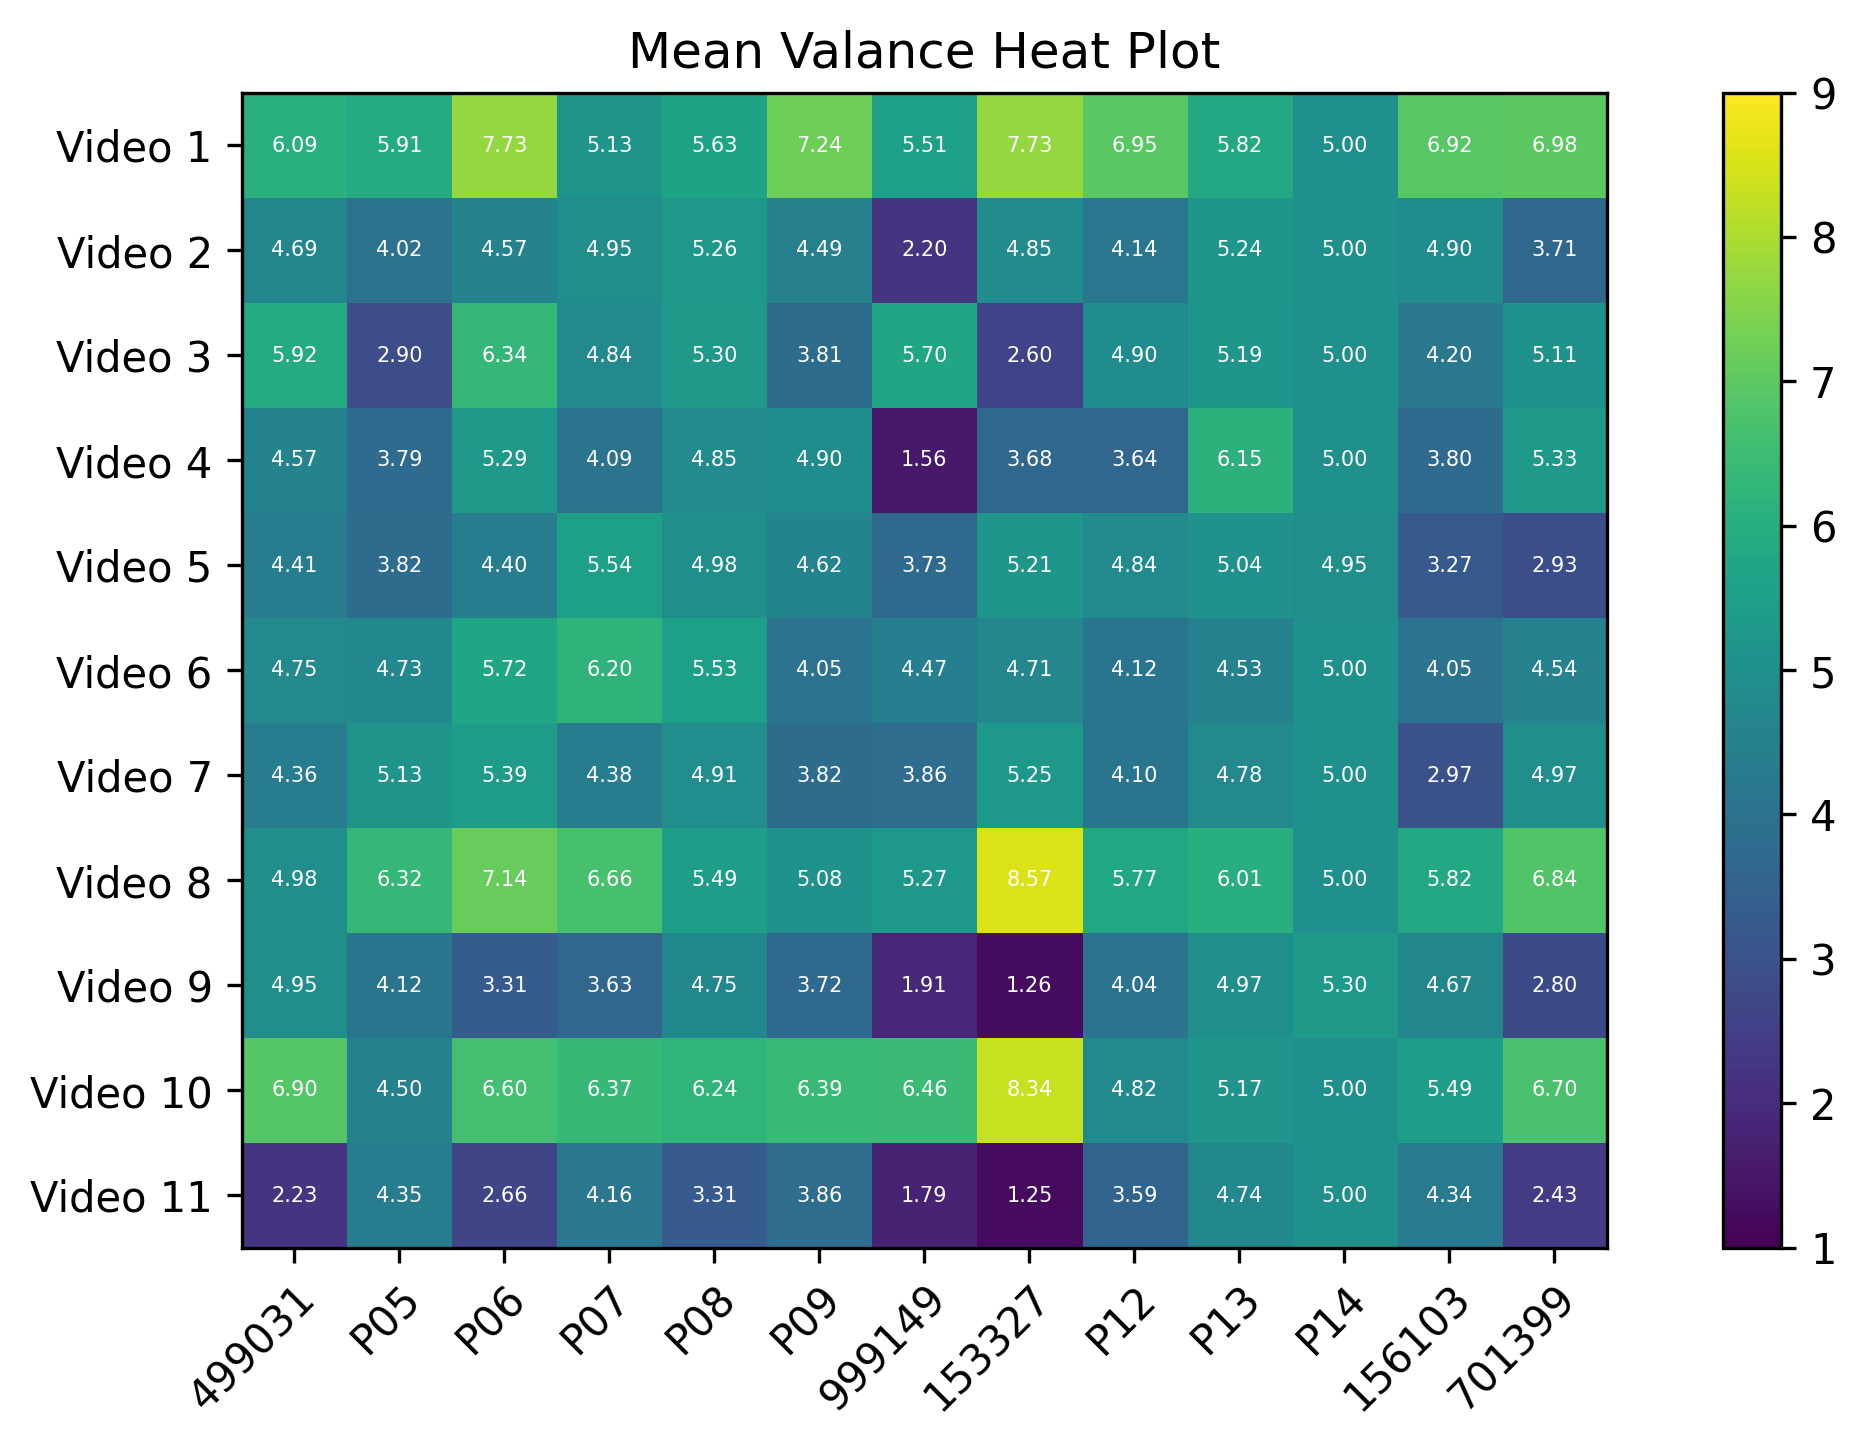

[ Message ] Plotting data for 'Mean Arousal Heat Plot'
 - Participants: 13, Videos: 11


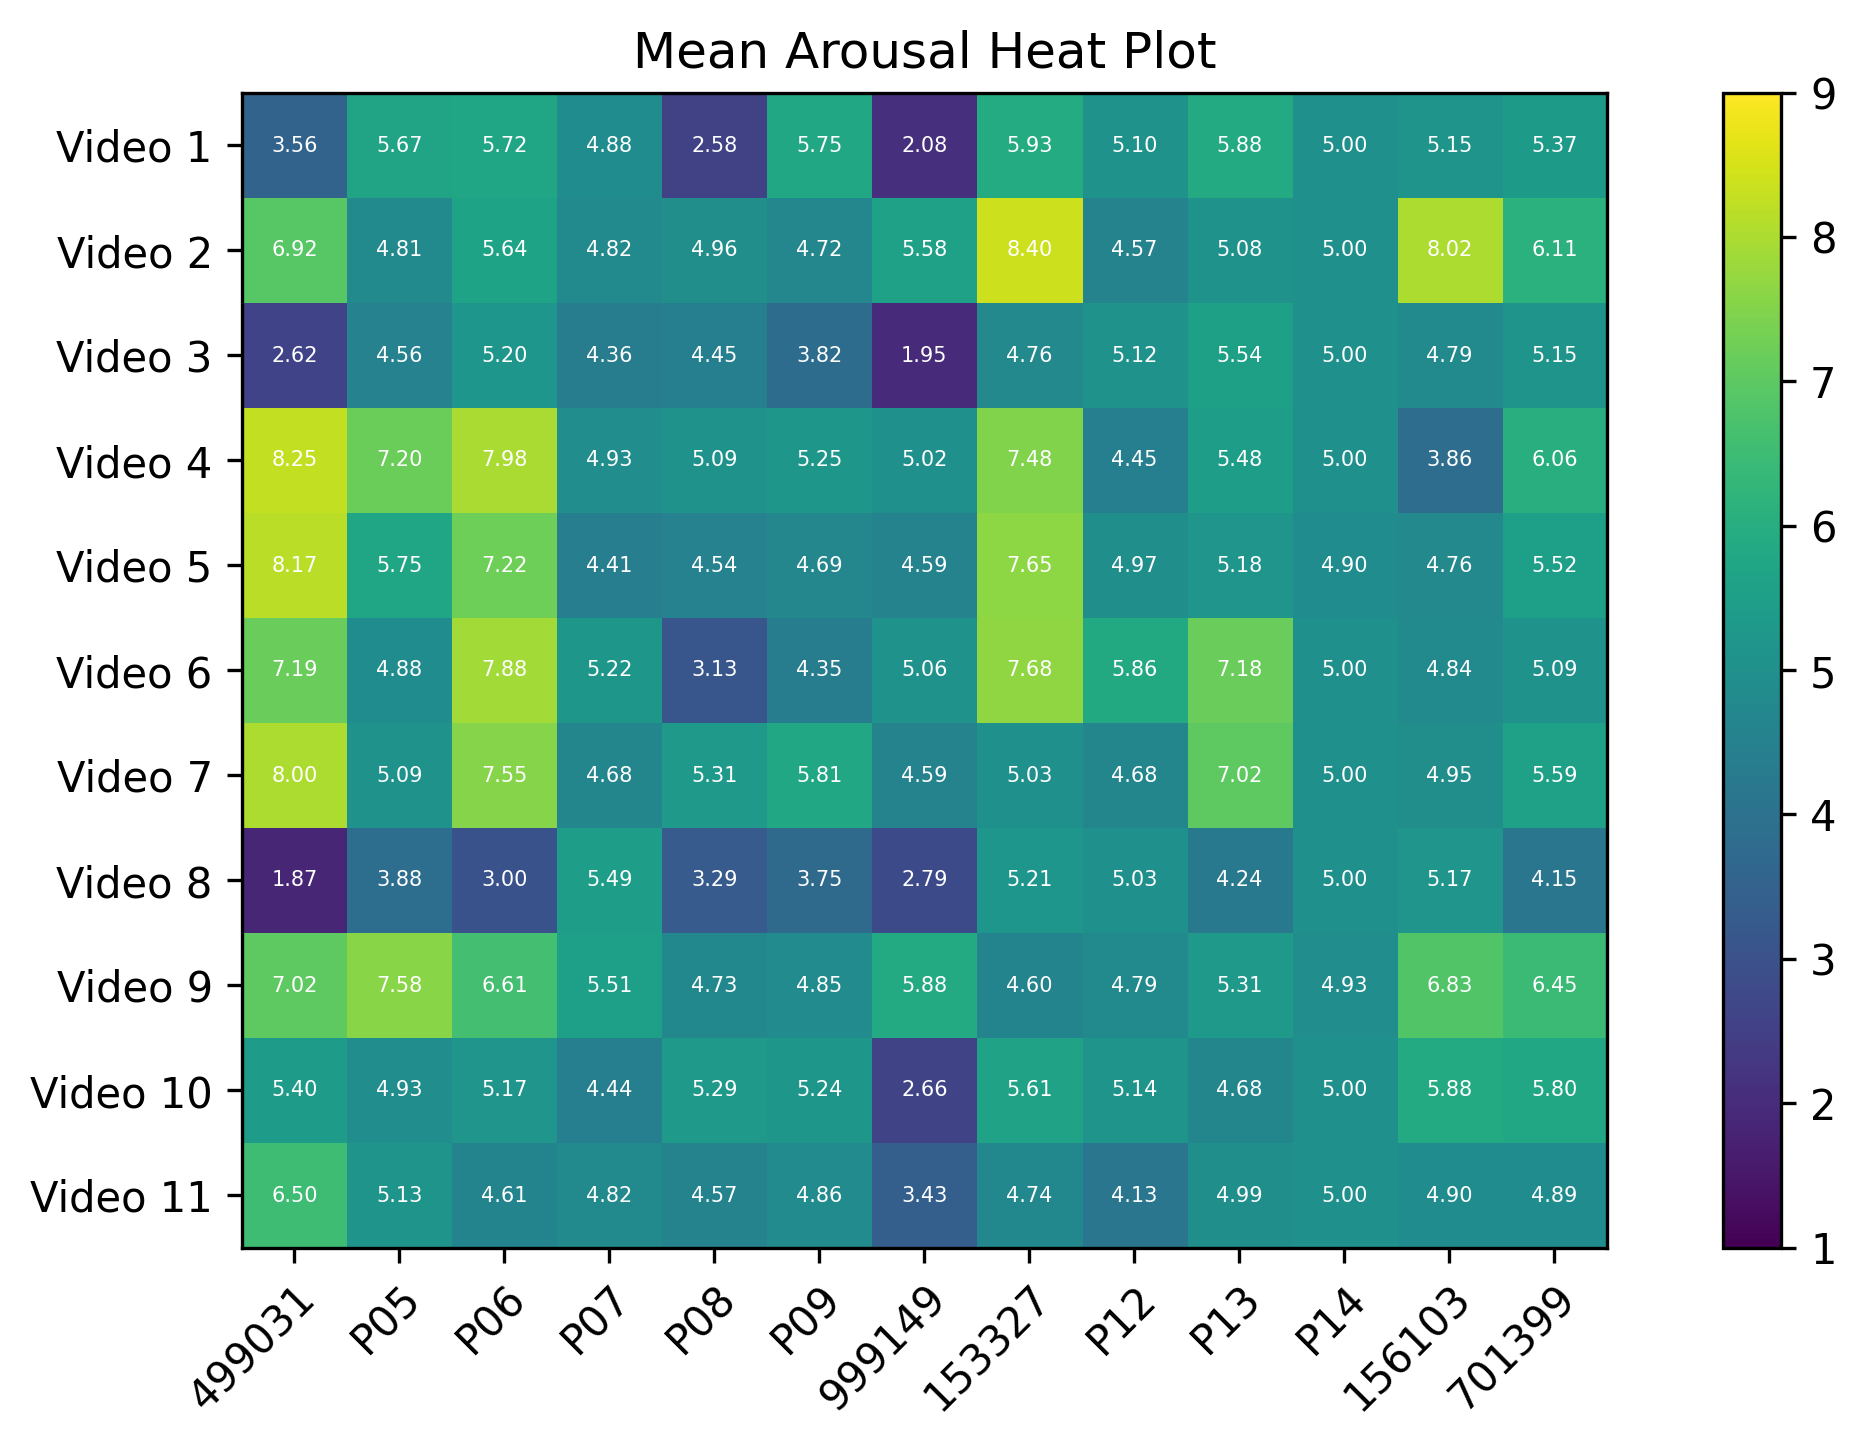

[ Message ] Plotting data for 'Mean HR Heat Plot'
 - Participants: 13, Videos: 11


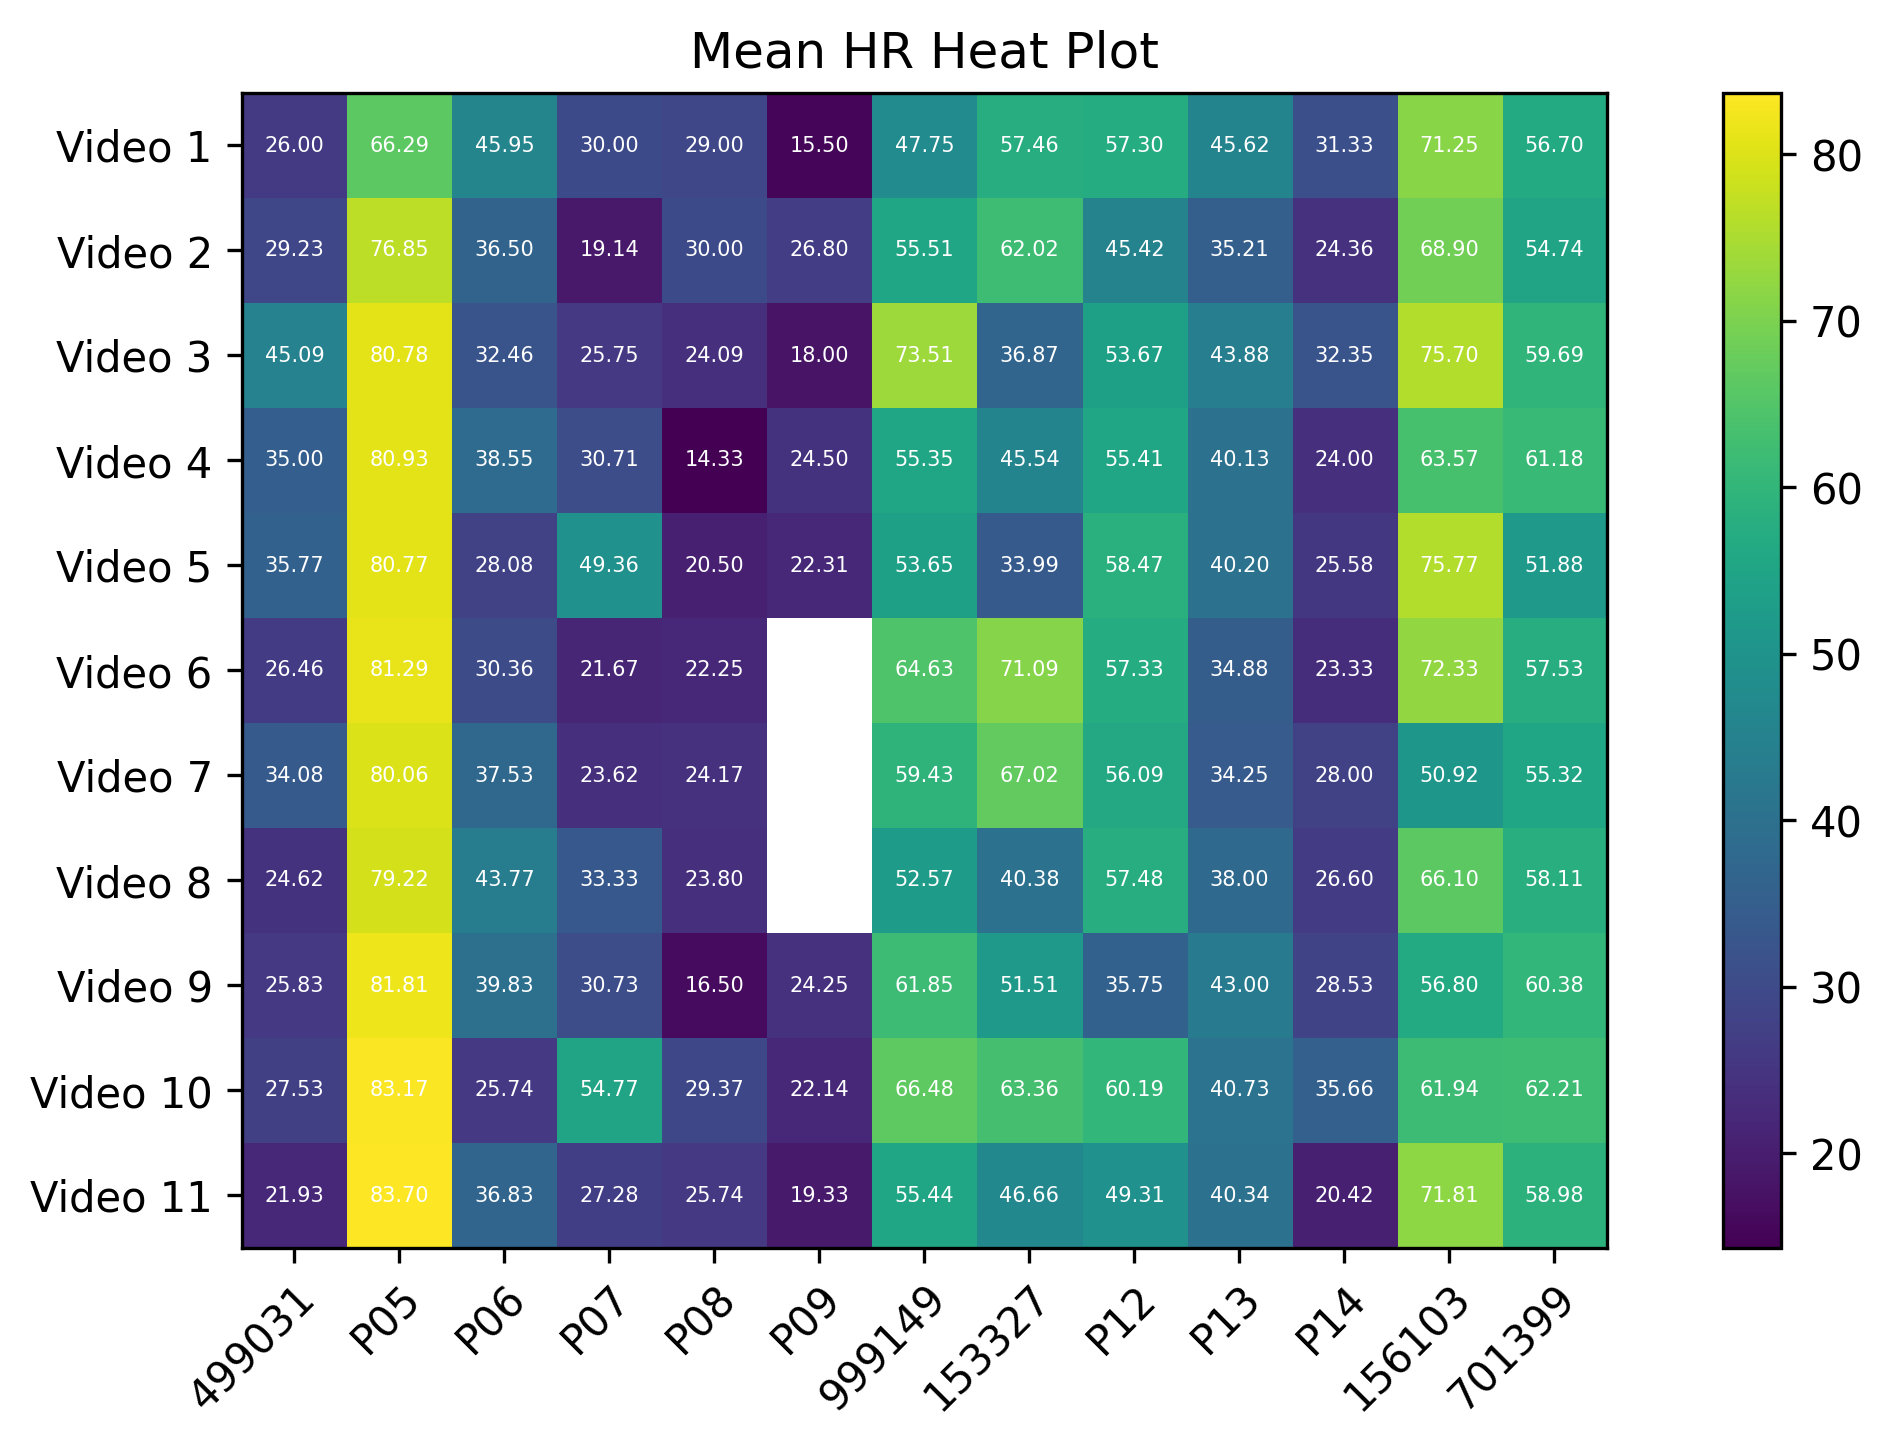

In [9]:
_valance_data = get_data("Av Rating Continuous", 0)
_shifted_valance_data = (((_valance_data + 1) / 2.0) * 8) + 1
generate_heat_plot("Mean Valance Heat Plot", _shifted_valance_data, [1.0, 9.0])

_arousal_data = get_data("Av Rating Continuous", 1)
_shifted_arousal_data = (((_arousal_data + 1) / 2.0) * 8) + 1
generate_heat_plot("Mean Arousal Heat Plot", _shifted_arousal_data, [1.0, 9.0])

_heart_rate_data = get_data("HR", 0)
generate_heat_plot("Mean HR Heat Plot", _heart_rate_data)